# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud_Analysis_Dataset.csv')

# EDA and Preprocessing

In [3]:
# gives first five rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [4]:
# gives last five rows
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0


In [5]:
df.shape

(11142, 10)

There are 11142 rows and 10 columns in the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


There are 3 categorical values and 7 numarical values

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [8]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


This dataset contain no null values

In [13]:
df.duplicated().sum()

np.int64(0)

This dataset contain zero duplicates

In [10]:
df.nunique()

,0
step,95
type,5
amount,10565
nameOrig,11142
oldbalanceOrg,7806
newbalanceOrig,5914
nameDest,7508
oldbalanceDest,4531
newbalanceDest,2030
isFraud,2


1. There are 5 types in transactions
2. target variable is isFraud contaning yes or no values

Text(0.5, 1.0, 'correlation matrix')

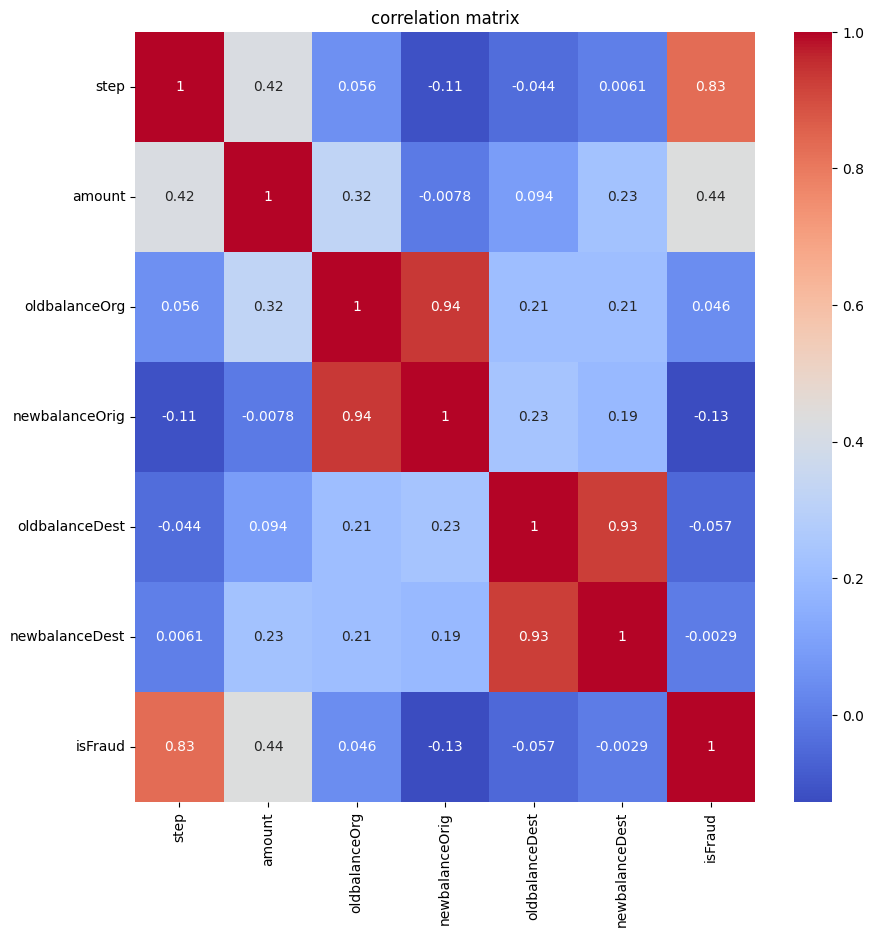

In [14]:
# heatmap
co = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(co,annot=True, cmap='coolwarm')
plt.title('correlation matrix')

<Axes: xlabel='count', ylabel='type'>

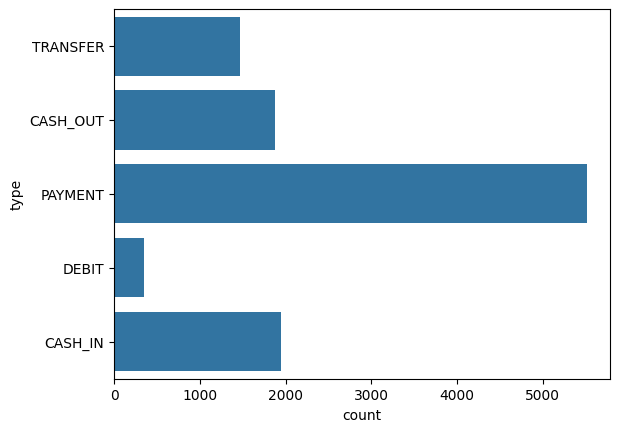

In [15]:
#countplot
sns.countplot(df['type'])

In [16]:
df['type'].value_counts()

,count
type,
PAYMENT,5510
CASH_IN,1951
CASH_OUT,1871
TRANSFER,1464
DEBIT,346


1. There are 5 types of transactions
2. Payment is the highest followed by cash_in
3. Debit is the lowest

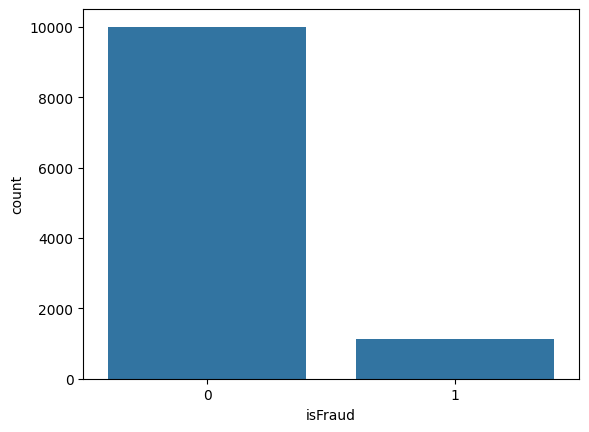

In [17]:
sns.countplot(x='isFraud', data=df)
plt.show()

In [18]:
df['isFraud'].value_counts()

,count
isFraud,
0,10000
1,1142


 As u can see non fraud count is more then fraud count. so this dataset is imbalance.

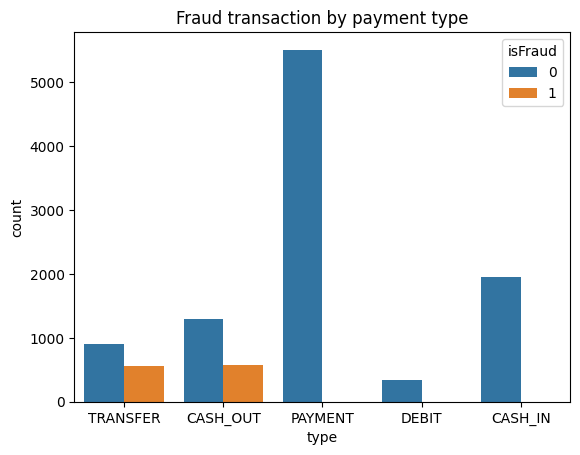

In [19]:
sns.countplot(x="type", hue="isFraud", data=df)
plt.title('Fraud transaction by payment type')
plt.show()

 Fraud is more common in TRANSFER and CASH_OUT transactions.

In [20]:
df.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1951
CASH_OUT  0          1293
          1           578
DEBIT     0           346
PAYMENT   0          5510
TRANSFER  0           900
          1           564
Name: count, dtype: int64

Text(0.5, 1.0, 'box plot for amount ')

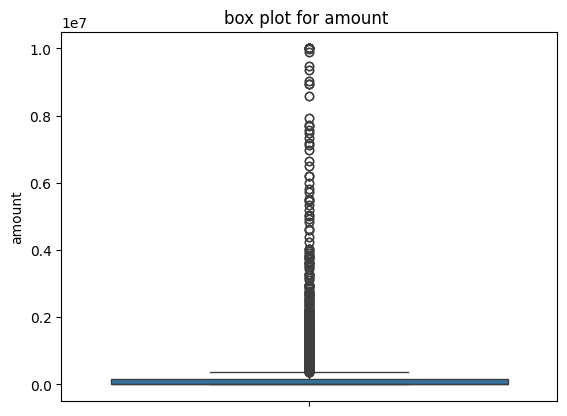

In [21]:
# boxplot
sns.boxplot(df['amount'])
plt.title('box plot for amount ')


As u can see there are many outliers in amount but this outliers are importat for us

Text(0.5, 1.0, 'box plot for step ')

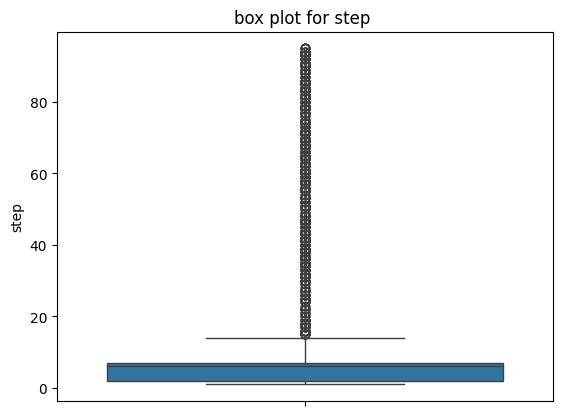

In [22]:
sns.boxplot(df['step'])
plt.title('box plot for step ')

there are many outliers in step

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [24]:
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis=1, inplace=True)

  We have dropped this columns cause they are highly corelated to each other, and also they carry almost same information as amount keeping all of them can confuse the model and cause redundancy.

In [25]:
# nameDest and nameOrig can be removed they are not much important

df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


In [26]:

df.head()

,step,type,amount,isFraud
0,1,TRANSFER,181.0,1
1,1,CASH_OUT,181.0,1
2,1,TRANSFER,2806.0,1
3,1,CASH_OUT,2806.0,1
4,1,TRANSFER,20128.0,1


In [27]:
from sklearn.preprocessing import LabelEncoder



In [28]:
# convert categorical values to numerical
le = LabelEncoder()


In [29]:
df['type']=le.fit_transform(df['type'])

In [30]:
#separating feature variables and class variables
x= df.drop('isFraud', axis=1)
y= df['isFraud']

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# standardizing the data
sc = StandardScaler()
x = sc.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split

# splitting the data into training and testing set

In [34]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

startify ensures train and test sets have same proportion of classes

In [35]:
y_train.value_counts()

,count
isFraud,
0,7000
1,799


In [36]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [38]:
print(y_train_resampled.value_counts())

isFraud
0    7000
1    7000
Name: count, dtype: int64


we have used smote cause we have unbalanced data. smote will help balance data

# model selections

1. Logistic Regression is simple and helps find clear patterns.
2. Random Forest is strong algorithm that Capture hidden fraud patterns.
3. Gradient Boosting improves fraud detection by learning from its mistakes, handling imbalanced data well, and capturing complex fraud patterns.
4. XGBoost is optimized version of Gradient Boosting, Best balance of speed & accuracy.

# logistic regrassion

In [39]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, roc_auc_score

In [45]:
LR= LogisticRegression()
LR.fit(x_train, y_train)


LogisticRegression()

In [46]:
y_pred= LR.predict(x_test)

In [47]:
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3000    0]
 [  46  297]]


In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {roc_auc}")


Accuracy: 0.986239904277595
Precision: 1.0
Recall: 0.8658892128279884
AUC-ROC: 0.9329446064139941


In [49]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3000
           1       1.00      0.87      0.93       343

    accuracy                           0.99      3343
   macro avg       0.99      0.93      0.96      3343
weighted avg       0.99      0.99      0.99      3343



 logistic regrassion model achieve an accurace of 98.62% also logistic regression model is highly precise 1.0%, meaning every fraud prediction is correct.but recall is lower 86.58%, meaning it misses some fraud cases. The AUC-ROC of 93.29% shows it separates fraud vs. non-fraud.

# Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
RF= RandomForestClassifier(random_state=42)
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred=RF.predict(x_test)

In [54]:
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2992    8]
 [  26  317]]


In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {roc_auc}")


Accuracy: 0.9898294944660485
Precision: 0.9753846153846154
Recall: 0.924198250728863
AUC-ROC: 0.9607657920310981


In [56]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3000
           1       0.98      0.92      0.95       343

    accuracy                           0.99      3343
   macro avg       0.98      0.96      0.97      3343
weighted avg       0.99      0.99      0.99      3343



RandomForest model achieve an accurace of 98.98% also RandomForest model is highly precise 97.53%, meaning almost every fraud prediction is correct. However, recall is 92.41%, meaning it misses few  fraud cases. The AUC-ROC of 96.07% shows it separates fraud vs. non-fraud.

# Gradient boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier


In [59]:
GB= GradientBoostingClassifier(random_state=42)
GB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [60]:
y_pred=GB.predict(x_test)

In [61]:
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2999    1]
 [  25  318]]


In [62]:
accuracy = accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {roc_auc}")


Accuracy: 0.9922225545916841
Precision: 0.9968652037617555
Recall: 0.9271137026239067
AUC-ROC: 0.9633901846452867


In [63]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3000
           1       1.00      0.93      0.96       343

    accuracy                           0.99      3343
   macro avg       0.99      0.96      0.98      3343
weighted avg       0.99      0.99      0.99      3343



GradientBoosting model achieve an accurace of 99.22% alsoGradientBoosting model is highly precise 99.68%, meaning almost every fraud prediction is correct. However, recall is 92.71%, meaning it misses  few  fraud cases. The AUC-ROC of 96.33% shows it separates fraud vs. non-fraud.

# XGB

In [45]:
!pip install xgboost
from xgboost import XGBClassifier

In [46]:
XG= XGBClassifier(random_state=42)
XG.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
y_pred=XG.predict(x_test)

In [49]:
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2997    3]
 [  22  321]]


In [50]:
accuracy = accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC-ROC: {roc_auc}")


Accuracy: 0.9925216871073885
Precision: 0.9907407407407407
Recall: 0.9358600583090378
AUC-ROC: 0.967430029154519


In [51]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3000
           1       0.99      0.94      0.96       343

    accuracy                           0.99      3343
   macro avg       0.99      0.97      0.98      3343
weighted avg       0.99      0.99      0.99      3343



XGB model achieve an accurace of 99.25% also XGBmodel is highly precise 99%, meaning almost every fraud prediction is correct. However, recall is 93.58%, meaning it misses few  fraud cases. The AUC-ROC of 96.74% indicates it distinguishes fraud from non-fraud

# conclusion

XGBoost is the best model for fraud detection, offering the highest balance between precision and recall while effectively identifying fraud cases. Gradient Boosting is a strong alternative, but XGBoost’s efficiency and performance make it the top choice. Random Forest performs well but is slightly weaker, and Logistic Regression is the least effective as it misses too many fraud cases.